# 송인욱 과제 pandas 

In [99]:
import pandas as pd
import matplotlib.pyplot as plt 
import platform

## (1) 데이터 읽기

In [100]:
df = pd.read_excel('../Data/subway.xls', sheet_name='지하철 시간대별 이용현황', header=[0, 1])
df.head()

사용월                호선명                역ID               지하철역  \
  Unnamed: 0_level_1 Unnamed: 1_level_1 Unnamed: 2_level_1 Unnamed: 3_level_1   
0            2022-06                1호선                150                서울역   
1            2022-06                1호선                151                 시청   
2            2022-06                1호선                152                 종각   
3            2022-06                1호선                153               종로3가   
4            2022-06                1호선                154               종로5가   

  04:00:00~04:59:59     05:00:00~05:59:59        06:00:00~06:59:59          \
                 승차  하차                승차     하차                승차      하차   
0               646  24             8,433  7,694            12,608  46,963   
1               271   7             3,133  4,802             3,321  23,621   
2                91   9             4,007  3,960             3,682  22,533   
3               190  12             3,882  3,261             3,570  14,038   
4                34   0             1,730  3,909             2,986  16,406   

   ... 23:00:00~23:59:59 00:00:00~00:59:59        01:00:00~01:59:59     \
   ...                하차                승차     하차                승차 하차   
0  ...            15,480               158  1,332                 1  4   
1  ...             2,938                72    422                 0  2   
2  ...             3,590               315    394                 0  1   
3  ...             4,119               310    843                 3  3   
4  ...             2,628                98    668                 0  0   

  02:00:00~02:59:59    03:00:00~03:59:59                    작업일시  
                 승차 하차                승차 하차  Unnamed: 52_level_1  
0                 0  1                 0  0  2022-07-03 09:48:05  
1                 0  0                 0  0  2022-07-03 09:48:05  
2                 0  0                 0  0  2022-07-03 09:48:05  
3                 0  0                 0  0  2022-07-03 09:48:05  
4                 0  0                 0  0  2022-07-03 09:48:05  

[5 rows x 53 columns]

## (2) 데이터 전처리

In [101]:
# 필요한 컬럼만 추출
hacha_df = df.iloc[:,[1, 3, 11, 13]]
print(hacha_df.head(), hacha_df.dtypes, sep='\n')

                 호선명               지하철역 07:00:00~07:59:59 08:00:00~08:59:59
  Unnamed: 1_level_1 Unnamed: 3_level_1                하차                하차
0                1호선                서울역           100,397           201,687
1                1호선                 시청            62,427           179,710
2                1호선                 종각            95,376           235,160
3                1호선               종로3가            25,469            68,699
4                1호선               종로5가            41,304            96,113
호선명                Unnamed: 1_level_1    object
지하철역               Unnamed: 3_level_1    object
07:00:00~07:59:59  하차                    object
08:00:00~08:59:59  하차                    object
dtype: object


In [102]:
# object int로 변경
for i in [2, 3]:
    hacha_df.iloc[:,i] = hacha_df.iloc[:,i].apply(lambda x: x.replace(',', ''))
    hacha_df.iloc[:,i] = hacha_df.iloc[:,i].astype('int64')

C:\Users\SIU\AppData\Local\Temp\ipykernel_8472\1961148580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hacha_df.iloc[:,i] = hacha_df.iloc[:,i].apply(lambda x: x.replace(',', ''))
C:\Users\SIU\AppData\Local\Temp\ipykernel_8472\1961148580.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hacha_df.iloc[:,i] = hacha_df.iloc[:,i].astype('int64')
C:\Users\SIU\AppData\Local\Temp\ipykernel_8472\1961148580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [103]:
# 필요한 데이터만 모은 df 만들어줌
hacha_df.columns = ['호선명', '지하철역', '하차1', '하차2']
total_list = hacha_df['하차1'] + hacha_df['하차2']
total_df = pd.concat([hacha_df.iloc[:,0:2], total_list], axis=1).rename(columns={0: 'total'})
total_df

,호선명,지하철역,total
0,1호선,서울역,302084
1,1호선,시청,242137
2,1호선,종각,330536
3,1호선,종로3가,94168
4,1호선,종로5가,137417
...,...,...,...
610,신림선,당곡,7492
611,신림선,신림,2779
612,신림선,서원,2296
613,신림선,서울대벤처타운,10140


## (3) 데이터 추출

In [104]:
line_list = [str(n) + '호선' for n in range(1,8)]
max_station = []
max_number = []
x_ticks = []

for i in line_list:
    line_df = total_df[total_df['호선명'] == i]
    max_number.append(line_df['total'].max())
    max_station.append(line_df['지하철역'].iloc[line_df['total'].argmax()])
for i in range(7):
    x_ticks.append(line_list[i] + ': ' + max_station[i])

In [105]:
# 폰트 설정
if platform.system() == "Windows":
    plt.rc("font", family="Malgun Gothic")
else:
    plt.rc("font", family="AppleGothic")

출근 시간대 1호선 최대 하차역은 종각역이고 하차인원은 330,536명 입니다
출근 시간대 2호선 최대 하차역은 역삼역이고 하차인원은 479,969명 입니다
출근 시간대 3호선 최대 하차역은 양재(서초구청)역이고 하차인원은 331,279명 입니다
출근 시간대 4호선 최대 하차역은 충무로역이고 하차인원은 208,776명 입니다
출근 시간대 5호선 최대 하차역은 여의도역이고 하차인원은 352,602명 입니다
출근 시간대 6호선 최대 하차역은 공덕역이고 하차인원은 134,342명 입니다
출근 시간대 7호선 최대 하차역은 가산디지털단지역이고 하차인원은 486,420명 입니다


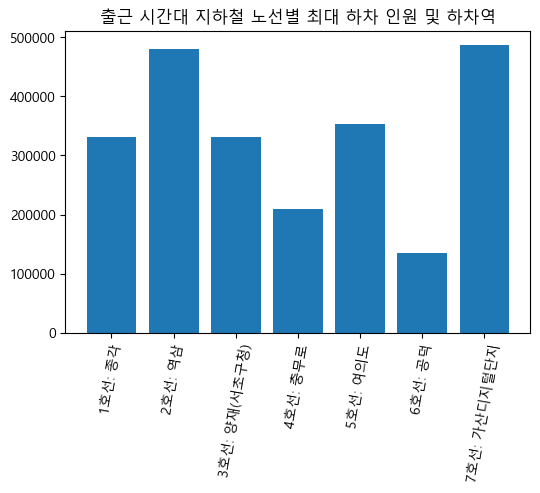

In [106]:
for i in range(7):
    print(
        f"출근 시간대 {line_list[i]} 최대 하차역은 {max_station[i]}역이고 하차인원은 {max_number[i]:,}명 입니다"
    )

plt.figure(dpi=100)
plt.bar(range(7), max_number)
plt.xticks(range(7), x_ticks, rotation=80)
plt.title("출근 시간대 지하철 노선별 최대 하차 인원 및 하차역")
plt.show()